# Bibliotecas

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação dos Dados

## Carregando os dados

### Importando dados do percurso

In [68]:
df_gpx = pd.read_csv(
    "tabela_final_lsmision_35km_ultima.csv", sep=";", index_col="Unnamed: 0"
)
df_gpx.head()

,latitude,longitude,elevacao,diff_elev,distancias,soma_elev,soma_dist,km_group,desnivel_positivo,desnivel_negativo
0,"-22,3905289","-44,9661817","922,0","0,0","0,0","0,0","0,0",0,"0,0","0,0"
1,"-22,3905414","-44,9661728","922,0","0,0","1,66","0,0","1,66",1,"0,0","0,0"
2,"-22,3905539","-44,9661641","922,0","0,0","1,65","0,0","3,3099999999999996",1,"0,0","0,0"
3,"-22,3905742","-44,9661552","921,0","-1,0","2,44","-1,0","5,75",1,"0,0","-1,0"
4,"-22,3905946","-44,9661465","921,0","0,0","2,44","-1,0","8,19",1,"0,0","0,0"


In [69]:
# Converter colunas de números com vírgula para ponto e tipo float
cols_to_convert = [
    "latitude",
    "longitude",
    "elevacao",
    "diff_elev",
    "distancias",
    "soma_elev",
    "soma_dist",
    "desnivel_positivo",
    "desnivel_negativo",
]
for col in cols_to_convert:
    df_gpx[col] = df_gpx[col].str.replace(",", ".", regex=False).astype(float)
df_gpx.head()

,latitude,longitude,elevacao,diff_elev,distancias,soma_elev,soma_dist,km_group,desnivel_positivo,desnivel_negativo
0,-22.390529,-44.966182,922.0,0.0,0.00,0.0,0.00,0,0.0,0.0
1,-22.390541,-44.966173,922.0,0.0,1.66,0.0,1.66,1,0.0,0.0
2,-22.390554,-44.966164,922.0,0.0,1.65,0.0,3.31,1,0.0,0.0
3,-22.390574,-44.966155,921.0,-1.0,2.44,-1.0,5.75,1,0.0,-1.0
4,-22.390595,-44.966147,921.0,0.0,2.44,-1.0,8.19,1,0.0,0.0


In [70]:
df_grouped = (
    df_gpx.groupby("km_group")
    .agg(
        {
            "elevacao": "first",
            "distancias": "sum",
            "soma_elev": "last",
            "soma_dist": "last",
            "desnivel_positivo": "sum",
            "desnivel_negativo": "sum",
        }
    )
    .reset_index()
)
df_grouped.tail(10)

,km_group,elevacao,distancias,soma_elev,soma_dist,desnivel_positivo,desnivel_negativo
28,28,1516.0,1000.04,343.0,27998.65,0.0,-251.0
29,29,1264.0,1000.72,222.0,28999.37,1.0,-122.0
30,30,1144.0,1000.50,81.0,29999.87,0.0,-141.0
31,31,1003.0,999.81,3.0,30999.68,1.0,-79.0
32,32,925.0,1000.23,46.0,31999.91,44.0,-1.0
33,33,968.0,997.33,188.0,32997.24,143.0,-1.0
34,34,1110.0,1001.26,147.0,33998.50,11.0,-52.0
35,35,1069.0,999.70,-2.0,34998.20,2.0,-151.0
36,36,919.0,1000.25,-3.0,35998.45,8.0,-9.0
37,37,919.0,13.26,-3.0,36011.71,0.0,0.0


In [71]:
df_grouped.head(10)

,km_group,elevacao,distancias,soma_elev,soma_dist,desnivel_positivo,desnivel_negativo
0,0,922.0,0.00,0.0,0.00,0.0,0.0
1,1,922.0,998.91,4.0,998.91,13.0,-9.0
2,2,926.0,998.61,92.0,1997.52,88.0,0.0
3,3,1014.0,999.61,150.0,2997.13,58.0,0.0
4,4,1073.0,999.36,115.0,3996.49,46.0,-81.0
5,5,1037.0,1001.56,98.0,4998.05,41.0,-58.0
6,6,1020.0,1001.28,215.0,5999.33,128.0,-11.0
7,7,1137.0,999.71,436.0,6999.04,228.0,-7.0
8,8,1357.0,1000.04,194.0,7999.08,1.0,-243.0
9,9,1116.0,997.91,73.0,8996.99,1.0,-122.0


In [72]:
df_grouped.describe()

,km_group,elevacao,distancias,soma_elev,soma_dist,desnivel_positivo,desnivel_negativo
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18.500000,1311.184211,947.676579,389.210526,18472.812632,73.342105,-73.421053
std,11.113055,395.795392,224.792307,395.897691,11069.869621,93.809547,86.031619
min,0.000000,919.000000,0.000000,-3.000000,0.000000,0.000000,-329.000000
25%,9.250000,1005.750000,999.255000,83.750000,9247.692500,3.750000,-132.500000
50%,18.500000,1134.000000,999.900000,212.500000,18499.550000,40.000000,-33.500000
75%,27.750000,1671.250000,1000.452500,749.250000,27748.640000,118.000000,-9.000000
max,37.000000,2192.000000,1002.810000,1270.000000,36011.710000,354.000000,0.000000


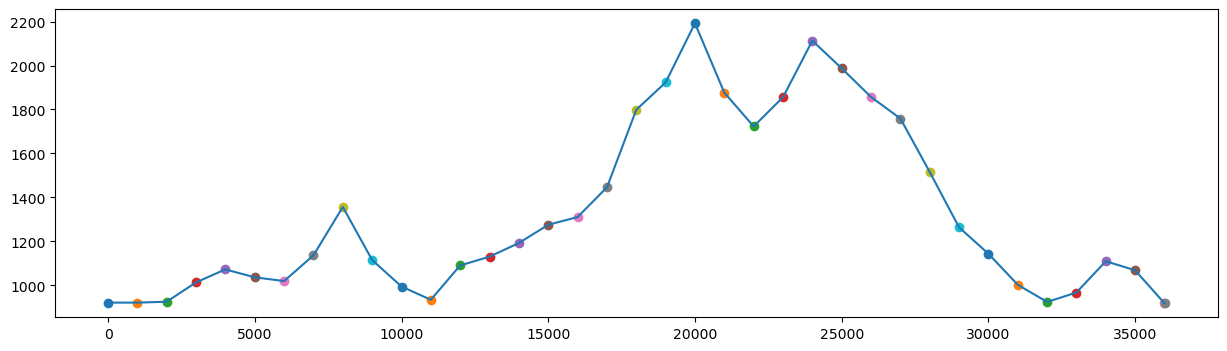

In [73]:
plt.figure(figsize=(15, 4))
plt.plot(df_grouped["soma_dist"], df_grouped["elevacao"], label="Elev")

# Adicionando os pontos para cada quilômetro
km_points = df_grouped[
    df_grouped["km_group"].notnull()
]  # Filtra apenas as linhas que têm 'km_group'
for km in km_points["km_group"].unique():
    km_dist = km_points[km_points["km_group"] == km]["soma_dist"].values[0]
    km_elev = km_points[km_points["km_group"] == km]["elevacao"].values[0]
    plt.scatter(km_dist, km_elev, label=f"{km} km")


### Importando dados dos Atletas

In [74]:
df_atletas_2023 = pd.read_csv("final_completo_dados_2023_FINAL_SEM_ERRO.csv", sep=",")
df_atletas_2023["ano"] = 2023

df_atletas_2023.head()

,Nome Atleta,Volta,Distância,Tempo,Ritmo,RAI,Elev.,FC,KM,Cadência,sexo,faixa_etaria,peso,ano
0,André Mapa,1.0,"1,00 km",4:45,4:45 /km,4:43 /km,-1 m,152 bpm,NaN,NaN,Homens,35 a 44,NaN,2023
1,André Mapa,2.0,"1,00 km",4:58,4:58 /km,3:34 /km,85 m,157 bpm,NaN,NaN,Homens,35 a 44,NaN,2023
2,André Mapa,3.0,"1,00 km",4:55,4:55 /km,3:59 /km,59 m,163 bpm,NaN,NaN,Homens,35 a 44,NaN,2023
3,André Mapa,4.0,"1,00 km",6:03,6:03 /km,3:59 /km,94 m,175 bpm,NaN,NaN,Homens,35 a 44,NaN,2023
4,André Mapa,5.0,"1,00 km",5:57,5:57 /km,4:20 /km,0 m,170 bpm,NaN,NaN,Homens,35 a 44,NaN,2023


In [75]:
df_atletas_2023_selecionado = df_atletas_2023[
    [
        "Nome Atleta",
        "Volta",
        "Tempo",
        "Ritmo",
        "KM",
        "FC",
        "sexo",
        "faixa_etaria",
        "peso",
        "ano",
    ]
]
df_atletas_2023_selecionado.head()

,Nome Atleta,Volta,Tempo,Ritmo,KM,FC,sexo,faixa_etaria,peso,ano
0,André Mapa,1.0,4:45,4:45 /km,NaN,152 bpm,Homens,35 a 44,NaN,2023
1,André Mapa,2.0,4:58,4:58 /km,NaN,157 bpm,Homens,35 a 44,NaN,2023
2,André Mapa,3.0,4:55,4:55 /km,NaN,163 bpm,Homens,35 a 44,NaN,2023
3,André Mapa,4.0,6:03,6:03 /km,NaN,175 bpm,Homens,35 a 44,NaN,2023
4,André Mapa,5.0,5:57,5:57 /km,NaN,170 bpm,Homens,35 a 44,NaN,2023


In [76]:
df_atletas_2023_selecionado["Nome Atleta"].nunique()

89

- Temos 89 atletas em 2023

In [77]:
df_atletas_2022 = pd.read_csv("final_completo_dados_2022_P1.csv", sep=",")
df_atletas_2022["ano"] = 2022
df_atletas_2022.head()

,Nome Atleta,Volta,Distância,Tempo,Ritmo,RAI,Elev.,KM,FC,Cadência,sexo,faixa_etaria,peso,ano
0,Ayslan Miragaia 🦅,1.0,"1,00 km",4:24,4:24 /km,4:19 /km,0 m,NaN,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
1,Ayslan Miragaia 🦅,2.0,"1,00 km",5:17,5:17 /km,3:41 /km,85 m,NaN,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
2,Ayslan Miragaia 🦅,3.0,"1,00 km",5:00,5:00 /km,3:53 /km,60 m,NaN,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
3,Ayslan Miragaia 🦅,4.0,"1,00 km",5:33,5:33 /km,3:48 /km,90 m,NaN,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
4,Ayslan Miragaia 🦅,5.0,"1,00 km",5:52,5:52 /km,4:19 /km,-11 m,NaN,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022


In [78]:
df_atletas_2022_selecionado = df_atletas_2022[
    [
        "Nome Atleta",
        "Volta",
        "Tempo",
        "Ritmo",
        "KM",
        "FC",
        "sexo",
        "faixa_etaria",
        "peso",
        "ano",
    ]
]
df_atletas_2022_selecionado.head()

,Nome Atleta,Volta,Tempo,Ritmo,KM,FC,sexo,faixa_etaria,peso,ano
0,Ayslan Miragaia 🦅,1.0,4:24,4:24 /km,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
1,Ayslan Miragaia 🦅,2.0,5:17,5:17 /km,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
2,Ayslan Miragaia 🦅,3.0,5:00,5:00 /km,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
3,Ayslan Miragaia 🦅,4.0,5:33,5:33 /km,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022
4,Ayslan Miragaia 🦅,5.0,5:52,5:52 /km,NaN,NaN,Homens,20 a 24,55 a 64 kg,2022


In [79]:
df_atletas_2022_selecionado["Nome Atleta"].nunique()

84

- Temos 84 atletas de 2022

In [80]:
df_atletas_concat = pd.concat(
    [df_atletas_2023_selecionado, df_atletas_2022_selecionado], ignore_index=True
)
df_atletas_concat

,Nome Atleta,Volta,Tempo,Ritmo,KM,FC,sexo,faixa_etaria,peso,ano
0,André Mapa,1.0,4:45,4:45 /km,NaN,152 bpm,Homens,35 a 44,NaN,2023
1,André Mapa,2.0,4:58,4:58 /km,NaN,157 bpm,Homens,35 a 44,NaN,2023
2,André Mapa,3.0,4:55,4:55 /km,NaN,163 bpm,Homens,35 a 44,NaN,2023
3,André Mapa,4.0,6:03,6:03 /km,NaN,175 bpm,Homens,35 a 44,NaN,2023
4,André Mapa,5.0,5:57,5:57 /km,NaN,170 bpm,Homens,35 a 44,NaN,2023
...,...,...,...,...,...,...,...,...,...,...
5854,Albert Melo,32.0,17:49,17:49 /km,NaN,160 bpm,Homens,25 a 34,75 a 84 kg,2022
5855,Albert Melo,33.0,16:48,16:48 /km,NaN,131 bpm,Homens,25 a 34,75 a 84 kg,2022
5856,Albert Melo,34.0,15:02,15:02 /km,NaN,129 bpm,Homens,25 a 34,75 a 84 kg,2022
5857,Albert Melo,35.0,13:47,13:47 /km,NaN,129 bpm,Homens,25 a 34,75 a 84 kg,2022


In [81]:
df_atletas_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome Atleta   5859 non-null   object 
 1   Volta         5288 non-null   float64
 2   Tempo         5288 non-null   object 
 3   Ritmo         5859 non-null   object 
 4   KM            571 non-null    object 
 5   FC            4665 non-null   object 
 6   sexo          5366 non-null   object 
 7   faixa_etaria  5523 non-null   object 
 8   peso          5130 non-null   object 
 9   ano           5859 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 457.9+ KB


In [82]:
df_atletas_concat["Nome Atleta"].nunique()

166

In [83]:
df_atletas_concat.to_csv("df_atletas_concat.csv", index=False)

## Tratando os dados

### Engenharia dos dados

- Vamos tratar, manipular, renomear colunas a fim de deixas as tabelas no formato que desejamos

#### Tabela Atleta

Vemos que a coluna 'Voltas' e a coluna 'KM' são a mesma coisa, ambas representam o Km daquela informação do atleta. E podemos ter atletas com uma coluna ou com a outra, então vamos consolidar em uma unica chamada 'km_prova'

In [84]:
df_atletas_concat["KM"] = df_atletas_concat["KM"].str.replace(",", ".").astype(float)

In [85]:
df_atletas_concat["km_prova"] = np.where(
    df_atletas_concat["Volta"].isnull(),
    df_atletas_concat["KM"],
    df_atletas_concat["Volta"],
)

df_atletas_concat.head()

,Nome Atleta,Volta,Tempo,Ritmo,KM,FC,sexo,faixa_etaria,peso,ano,km_prova
0,André Mapa,1.0,4:45,4:45 /km,NaN,152 bpm,Homens,35 a 44,NaN,2023,1.0
1,André Mapa,2.0,4:58,4:58 /km,NaN,157 bpm,Homens,35 a 44,NaN,2023,2.0
2,André Mapa,3.0,4:55,4:55 /km,NaN,163 bpm,Homens,35 a 44,NaN,2023,3.0
3,André Mapa,4.0,6:03,6:03 /km,NaN,175 bpm,Homens,35 a 44,NaN,2023,4.0
4,André Mapa,5.0,5:57,5:57 /km,NaN,170 bpm,Homens,35 a 44,NaN,2023,5.0


In [86]:
df_atletas_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome Atleta   5859 non-null   object 
 1   Volta         5288 non-null   float64
 2   Tempo         5288 non-null   object 
 3   Ritmo         5859 non-null   object 
 4   KM            571 non-null    float64
 5   FC            4665 non-null   object 
 6   sexo          5366 non-null   object 
 7   faixa_etaria  5523 non-null   object 
 8   peso          5130 non-null   object 
 9   ano           5859 non-null   int64  
 10  km_prova      5859 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 503.6+ KB


In [87]:
df_atletas_concat[df_atletas_concat["km_prova"].isna()]

,Nome Atleta,Volta,Tempo,Ritmo,KM,FC,sexo,faixa_etaria,peso,ano,km_prova


- Agora não temos mais as colunas 'Volta' e 'KM', apenas a coluna 'km_prova' que representa a distância da prova para cada atleta. E não existe nenhum atleta sem essa informação.

In [88]:
df_atletas_concat = df_atletas_concat.drop(columns=["Volta", "KM"])
df_atletas_concat.head()

,Nome Atleta,Tempo,Ritmo,FC,sexo,faixa_etaria,peso,ano,km_prova
0,André Mapa,4:45,4:45 /km,152 bpm,Homens,35 a 44,NaN,2023,1.0
1,André Mapa,4:58,4:58 /km,157 bpm,Homens,35 a 44,NaN,2023,2.0
2,André Mapa,4:55,4:55 /km,163 bpm,Homens,35 a 44,NaN,2023,3.0
3,André Mapa,6:03,6:03 /km,175 bpm,Homens,35 a 44,NaN,2023,4.0
4,André Mapa,5:57,5:57 /km,170 bpm,Homens,35 a 44,NaN,2023,5.0


Temos tambem a coluna 'Tempo' e 'Ritmo' que também são as mesmas coisas, e alguns atletas tem uma e não tem a outra informação, então vamos consolidar igual fizemos com as colunas 'KM' e 'Voltas'. Porém antes temos que limpar a coluna 'Ritmo' pois ela tem alem do numero tem a descrição, Exemplo: "6:03 /km".

In [89]:
df_atletas_concat["Ritmo"] = df_atletas_concat["Ritmo"].str.split(" /").str[0]
df_atletas_concat.head()

,Nome Atleta,Tempo,Ritmo,FC,sexo,faixa_etaria,peso,ano,km_prova
0,André Mapa,4:45,4:45,152 bpm,Homens,35 a 44,NaN,2023,1.0
1,André Mapa,4:58,4:58,157 bpm,Homens,35 a 44,NaN,2023,2.0
2,André Mapa,4:55,4:55,163 bpm,Homens,35 a 44,NaN,2023,3.0
3,André Mapa,6:03,6:03,175 bpm,Homens,35 a 44,NaN,2023,4.0
4,André Mapa,5:57,5:57,170 bpm,Homens,35 a 44,NaN,2023,5.0


- Agora sim podemos consolidar

In [90]:
df_atletas_concat["tempo_por_km"] = df_atletas_concat["Tempo"].fillna(
    df_atletas_concat["Ritmo"]
)
df_atletas_concat = df_atletas_concat.drop(columns=["Tempo", "Ritmo"])
df_atletas_concat.head()

,Nome Atleta,FC,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km
0,André Mapa,152 bpm,Homens,35 a 44,NaN,2023,1.0,4:45
1,André Mapa,157 bpm,Homens,35 a 44,NaN,2023,2.0,4:58
2,André Mapa,163 bpm,Homens,35 a 44,NaN,2023,3.0,4:55
3,André Mapa,175 bpm,Homens,35 a 44,NaN,2023,4.0,6:03
4,André Mapa,170 bpm,Homens,35 a 44,NaN,2023,5.0,5:57


- Agora temos uma só coluna que representa o tempo em minutos e segundos gastos por Kilometro, vamos transformar em segundos para termos uma variavel numerica.

In [91]:
df_atletas_concat[df_atletas_concat["Nome Atleta"] == "Robson Ribeiro"]

,Nome Atleta,FC,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km
2857,Robson Ribeiro,147 bpm,Homens,35 a 44,95 kg a 104 kg,2023,1.0,6:54
2858,Robson Ribeiro,164 bpm,Homens,35 a 44,95 kg a 104 kg,2023,2.0,10:59
2859,Robson Ribeiro,159 bpm,Homens,35 a 44,95 kg a 104 kg,2023,3.0,10:27
2860,Robson Ribeiro,160 bpm,Homens,35 a 44,95 kg a 104 kg,2023,4.0,13:25
2861,Robson Ribeiro,122 bpm,Homens,35 a 44,95 kg a 104 kg,2023,5.0,31:48
2862,Robson Ribeiro,115 bpm,Homens,35 a 44,95 kg a 104 kg,2023,6.0,27:09
2863,Robson Ribeiro,160 bpm,Homens,35 a 44,95 kg a 104 kg,2023,7.0,13:00
2864,Robson Ribeiro,162 bpm,Homens,35 a 44,95 kg a 104 kg,2023,8.0,8:00
2865,Robson Ribeiro,158 bpm,Homens,35 a 44,95 kg a 104 kg,2023,9.0,9:59
2866,Robson Ribeiro,161 bpm,Homens,35 a 44,95 kg a 104 kg,2023,10.0,24:25


In [92]:
def converter_tempo_para_segundos(tempo_str):
    """
    Converte uma string de tempo (nos formatos 'H:M:S', 'M:S' ou 'S s')
    para o total de segundos.
    """
    # 1. Retorna None se o valor for nulo/NaN
    if pd.isnull(tempo_str):
        return None

    # 2. Garante que é uma string e remove espaços extras
    tempo_str = str(tempo_str).strip()

    # 3. Divide a string pelos ':' para contar as partes
    partes = tempo_str.split(":")

    # 4. Verifica o formato e calcula os segundos
    if len(partes) == 3:
        # Formato H:M:S (ex: '1:08:16')
        h, m, s = partes
        return int(h) * 3600 + int(m) * 60 + int(s)
    elif len(partes) == 2:
        # Formato M:S (ex: '6:54')
        m, s = partes
        return int(m) * 60 + int(s)
    elif "s" in tempo_str.lower():
        # Formato S s (ex: '51 s')
        segundos_str = tempo_str.lower().replace("s", "").strip()
        return int(segundos_str)
    else:
        # Se o formato for inesperado, retorna None
        return None


df_atletas_concat["tempo_por_km_seg"] = df_atletas_concat["tempo_por_km"].apply(
    converter_tempo_para_segundos
)
# df_atletas_concat = df_atletas_concat.drop(columns=["tempo_por_km"])
df_atletas_concat.head()

,Nome Atleta,FC,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km,tempo_por_km_seg
0,André Mapa,152 bpm,Homens,35 a 44,NaN,2023,1.0,4:45,285
1,André Mapa,157 bpm,Homens,35 a 44,NaN,2023,2.0,4:58,298
2,André Mapa,163 bpm,Homens,35 a 44,NaN,2023,3.0,4:55,295
3,André Mapa,175 bpm,Homens,35 a 44,NaN,2023,4.0,6:03,363
4,André Mapa,170 bpm,Homens,35 a 44,NaN,2023,5.0,5:57,357


In [93]:
df_atletas_concat = df_atletas_concat.drop(columns="tempo_por_km")
df_atletas_concat.head()

,Nome Atleta,FC,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg
0,André Mapa,152 bpm,Homens,35 a 44,NaN,2023,1.0,285
1,André Mapa,157 bpm,Homens,35 a 44,NaN,2023,2.0,298
2,André Mapa,163 bpm,Homens,35 a 44,NaN,2023,3.0,295
3,André Mapa,175 bpm,Homens,35 a 44,NaN,2023,4.0,363
4,André Mapa,170 bpm,Homens,35 a 44,NaN,2023,5.0,357


- Agora temos nossa coluna Segundos por KM.

Assim fica nossa tabela atletas final.

In [94]:
df_atletas_concat.head()

,Nome Atleta,FC,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg
0,André Mapa,152 bpm,Homens,35 a 44,NaN,2023,1.0,285
1,André Mapa,157 bpm,Homens,35 a 44,NaN,2023,2.0,298
2,André Mapa,163 bpm,Homens,35 a 44,NaN,2023,3.0,295
3,André Mapa,175 bpm,Homens,35 a 44,NaN,2023,4.0,363
4,André Mapa,170 bpm,Homens,35 a 44,NaN,2023,5.0,357


In [95]:
df_atletas_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome Atleta       5859 non-null   object 
 1   FC                4665 non-null   object 
 2   sexo              5366 non-null   object 
 3   faixa_etaria      5523 non-null   object 
 4   peso              5130 non-null   object 
 5   ano               5859 non-null   int64  
 6   km_prova          5859 non-null   float64
 7   tempo_por_km_seg  5859 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 366.3+ KB


#### Tabela Percurso

In [96]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km_group           38 non-null     int64  
 1   elevacao           38 non-null     float64
 2   distancias         38 non-null     float64
 3   soma_elev          38 non-null     float64
 4   soma_dist          38 non-null     float64
 5   desnivel_positivo  38 non-null     float64
 6   desnivel_negativo  38 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.2 KB


In [97]:
df_grouped.rename(columns={"km_group": "km_prova"}, inplace=True)
df_percurso = df_grouped[["km_prova", "desnivel_positivo", "desnivel_negativo"]].copy()
df_percurso.head(10)

,km_prova,desnivel_positivo,desnivel_negativo
0,0,0.0,0.0
1,1,13.0,-9.0
2,2,88.0,0.0
3,3,58.0,0.0
4,4,46.0,-81.0
5,5,41.0,-58.0
6,6,128.0,-11.0
7,7,228.0,-7.0
8,8,1.0,-243.0
9,9,1.0,-122.0


#### Salvando tabela final Percurso


In [98]:
df_percurso.to_csv("df_percurso_final.csv", index=False)

### Limpeza dos dados

### Verificando valores faltantes

In [99]:
print(df_atletas_concat.isnull().sum() / len(df_atletas_concat) * 100)

Nome Atleta          0.000000
FC                  20.378904
sexo                 8.414405
faixa_etaria         5.734767
peso                12.442396
ano                  0.000000
km_prova             0.000000
tempo_por_km_seg     0.000000
dtype: float64


Aqui temos pontos a destacar:
- As varáveis 'sexo', 'faixa_etaria' e 'peso' são cruciais para nossas análises futuras, e tem uma baixa quantidade de valores faltantes, então vamos tratar elas:

   -- As variáveis 'sexo' e 'faixa_etaria' tem uma baixa porcentagem de valores nulos e vão ser importantes, então vamos apenas remover as linhas com valores nulos.

   -- A variável 'peso' ja tem 12,4% de falta, então se removermos as linhas faltantes, vai impactar nossos dados, vamos trasnformar esses valores faltantes em uma    nova classe, 'Não informado'.

- A varável 'FC' tem uma grande porcentagem de valores faltantes, então vamos remove-la da nossa base.

In [100]:
# Remover linhas com valores nulos em 'sexo' e 'faixa_etaria'
df_atletas_concat = df_atletas_concat.dropna(subset=['sexo', 'faixa_etaria'])

# Preencher valores nulos em 'peso' com 'Não informado'
df_atletas_concat['peso'] = df_atletas_concat['peso'].fillna('Não informado')

# Remover a coluna 'FC' devido à alta porcentagem de valores faltantes
df_atletas_concat = df_atletas_concat.drop(columns=['FC'])
df_atletas_concat.head(5)

,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357


In [101]:
print(df_atletas_concat.isnull().sum() / len(df_atletas_concat) * 100)

Nome Atleta         0.0
sexo                0.0
faixa_etaria        0.0
peso                0.0
ano                 0.0
km_prova            0.0
tempo_por_km_seg    0.0
dtype: float64


### Limpando valores duplicados

- Podemos ter alguns atletas repetidos em nossas tabelas

In [102]:
df_limpo = df_atletas_concat.drop_duplicates()

In [103]:
contagem_km_por_atleta = df_limpo["Nome Atleta"].value_counts()
print(contagem_km_por_atleta)

Chris 🏃🏼‍♀️🚴🏼‍♀️             73
Alex Junior Aj               72
Lebre Cigano                 72
Mikael Martins               71
Arnaldo Junio Rocha Pinho    71
                             ..
Anderson Batata               2
Henrique Fernandes🦍           2
Brunno Leoni                  2
Edu Castro                    2
Ezequiel Morales              2
Name: Nome Atleta, Length: 149, dtype: int64


Podemos observar dois pontos principais:

1- É que alguns atletas participaram mais de uma vez nessa prova, vamos pegar apenas a primeira participação de cada, pois como vamos fazer comparações entre grupos, essa relação do atelta em duas provas gera dependencia, pois nossos dados deixam de ser independentes pois um atleta aparece mais de uma vez.

2- Quantidade de kms por alteta menor que 35, que é a quantidade de km da prova, podendo ser causado pelo instrumento usado na medição do desempenho na prova. Vamos remove-los também.

In [104]:
# 1. Para cada linha, crie uma nova coluna que informa qual o primeiro ano para aquele atleta
df_limpo.loc[:, ("ano_mais_antigo")] = df_limpo.groupby("Nome Atleta")["ano"].transform(
    "min"
)
# Exibir as primeiras linhas do DataFrame para conferência
df_limpo.head()

C:\Users\joaomm\AppData\Local\Temp\ipykernel_24512\3383683732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo.loc[:, ("ano_mais_antigo")] = df_limpo.groupby("Nome Atleta")["ano"].transform(


,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg,ano_mais_antigo
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285,2023
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298,2023
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295,2023
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363,2023
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357,2023


In [105]:
df_atletas_final = df_limpo[df_limpo["ano"] == df_limpo["ano_mais_antigo"]].copy()

# 3. (Opcional, mas recomendado) Remova a coluna auxiliar
df_atletas_final.head()

,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg,ano_mais_antigo
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285,2023
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298,2023
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295,2023
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363,2023
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357,2023


In [106]:
# Verificação 1: Contar quantos anos diferentes existem por atleta no dataframe final.
# O resultado deve ser 1 para todos.
print("Contagem de anos por atleta no dataframe final:")
print(df_atletas_final.groupby("Nome Atleta")["ano"].nunique())

# Verificação 2: Contar quantas linhas (KMs) existem por atleta.
# Os valores agora devem estar em torno de 35, e não 72.
print("\nContagem de KMs por atleta no dataframe final:")
print(df_atletas_final["Nome Atleta"].value_counts())

Contagem de anos por atleta no dataframe final:
Nome Atleta
ALFREDO GUIMARAES         1
Albert Melo               1
Alessandro Sousa(allê)    1
Alex Junior Aj            1
Alexandre Martinez        1
                         ..
Vinicius Brandão          1
Vinicius Da Cruz Faria    1
Vivi RF                   1
clemilson silva           1
👑 VIRGINIO🏔               1
Name: ano, Length: 149, dtype: int64

Contagem de KMs por atleta no dataframe final:
Lebre Cigano                     72
Fernando Nazário                 51
Tony Ortiz                       40
Aquaria Mundi                    38
Pedro Henrique Gonçalves (PH)    38
                                 ..
Henrique Fernandes🦍               2
Anderson Batata                   2
Edu Castro                        2
Brunno Leoni                      2
Ezequiel Morales                  2
Name: Nome Atleta, Length: 149, dtype: int64


- Podemos observar que mesmo após pegarmos a primeira participação na prova, ainda temos algumas observações com quantidade de km maior que 36, isso acontece pois o relogio, ou instrumento que marcou o desempenho durante o percurso pode quebrar a marcação em distancias menores, ou seja, o normal é marcar a cada 1km, porem pode acontecer que marcou a cada 500 metros, ou marcou a cada 1km mas depois teve marcações após 400m e depois 600m, enfim, erro de marcação. vamos remover todos esses que tem valores menores ou maiores que 36 km

In [107]:
contagem_km_por_atleta = df_atletas_final["Nome Atleta"].value_counts()
print(contagem_km_por_atleta)

Lebre Cigano                     72
Fernando Nazário                 51
Tony Ortiz                       40
Aquaria Mundi                    38
Pedro Henrique Gonçalves (PH)    38
                                 ..
Henrique Fernandes🦍               2
Anderson Batata                   2
Edu Castro                        2
Brunno Leoni                      2
Ezequiel Morales                  2
Name: Nome Atleta, Length: 149, dtype: int64


In [108]:
# Primeiro, crie uma lista de nomes de atletas válidos
atletas_validos = contagem_km_por_atleta[
    (contagem_km_por_atleta >= 34) & (contagem_km_por_atleta <= 36)
].index

# Depois, filtre o dataframe original para manter apenas esses atletas
df_atletas_filtrado = df_atletas_final[
    df_atletas_final["Nome Atleta"].isin(atletas_validos)
].copy()

In [109]:
contagem_km_por_atleta = df_atletas_filtrado['Nome Atleta'].value_counts()
print(contagem_km_por_atleta)

Maria Lúcia Simois          36
Paloma Galper               36
Leonardo Perim              36
Atleta Oelerson Sant Ana    36
Thiago Aguiar               36
                            ..
Raone Faria                 35
Evelyn Carboneiro           35
Pretinha Miguel             35
André Mapa                  35
Fernando Biagioni           34
Name: Nome Atleta, Length: 109, dtype: int64


In [110]:
df_atletas_filtrado['Nome Atleta'].nunique()

109

- Ao fim, temos 109 atletas.

##### Filtrando kms menor que 1

In [111]:
df_atletas_filtrado = df_atletas_filtrado[df_atletas_filtrado['km_prova'] >= 1]
df_atletas_filtrado.head(10)

,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg,ano_mais_antigo
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285,2023
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298,2023
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295,2023
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363,2023
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357,2023
5,André Mapa,Homens,35 a 44,Não informado,2023,6.0,670,2023
6,André Mapa,Homens,35 a 44,Não informado,2023,7.0,258,2023
7,André Mapa,Homens,35 a 44,Não informado,2023,8.0,211,2023
8,André Mapa,Homens,35 a 44,Não informado,2023,9.0,338,2023
9,André Mapa,Homens,35 a 44,Não informado,2023,10.0,544,2023


#### Exportando tabela final - Tratada e limpo

In [112]:
df_atletas_filtrado.to_csv("df_atletas_filtrado.csv", index=False)

### Juntando a tabela de atletas com a informação do Percurso

In [113]:
df_atletas_correto = pd.read_csv("df_atletas_filtrado.csv", sep=",")
df_atletas_correto.head(10)

,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg,ano_mais_antigo
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285,2023
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298,2023
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295,2023
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363,2023
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357,2023
5,André Mapa,Homens,35 a 44,Não informado,2023,6.0,670,2023
6,André Mapa,Homens,35 a 44,Não informado,2023,7.0,258,2023
7,André Mapa,Homens,35 a 44,Não informado,2023,8.0,211,2023
8,André Mapa,Homens,35 a 44,Não informado,2023,9.0,338,2023
9,André Mapa,Homens,35 a 44,Não informado,2023,10.0,544,2023


In [114]:
df_percurso_final = pd.read_csv("df_percurso_final.csv", sep=",")
df_percurso_final.head(10)

,km_prova,desnivel_positivo,desnivel_negativo
0,0,0.0,0.0
1,1,13.0,-9.0
2,2,88.0,0.0
3,3,58.0,0.0
4,4,46.0,-81.0
5,5,41.0,-58.0
6,6,128.0,-11.0
7,7,228.0,-7.0
8,8,1.0,-243.0
9,9,1.0,-122.0


In [115]:
df_completo = pd.merge(df_atletas_correto, df_percurso_final, on="km_prova", how="left")
df_completo.head(10)

,Nome Atleta,sexo,faixa_etaria,peso,ano,km_prova,tempo_por_km_seg,ano_mais_antigo,desnivel_positivo,desnivel_negativo
0,André Mapa,Homens,35 a 44,Não informado,2023,1.0,285,2023,13.0,-9.0
1,André Mapa,Homens,35 a 44,Não informado,2023,2.0,298,2023,88.0,0.0
2,André Mapa,Homens,35 a 44,Não informado,2023,3.0,295,2023,58.0,0.0
3,André Mapa,Homens,35 a 44,Não informado,2023,4.0,363,2023,46.0,-81.0
4,André Mapa,Homens,35 a 44,Não informado,2023,5.0,357,2023,41.0,-58.0
5,André Mapa,Homens,35 a 44,Não informado,2023,6.0,670,2023,128.0,-11.0
6,André Mapa,Homens,35 a 44,Não informado,2023,7.0,258,2023,228.0,-7.0
7,André Mapa,Homens,35 a 44,Não informado,2023,8.0,211,2023,1.0,-243.0
8,André Mapa,Homens,35 a 44,Não informado,2023,9.0,338,2023,1.0,-122.0
9,André Mapa,Homens,35 a 44,Não informado,2023,10.0,544,2023,9.0,-69.0


In [116]:
df_completo.to_csv("df_completo_final.csv", index=False)